<a href="https://colab.research.google.com/github/glouwa/app-kandinsky-pattern-generator/blob/master/inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
!rm -rf train
!rm -rf test
!wget https://github.com/glouwa/app-kandinsky-pattern-generator/raw/master/app-kandinsky-pattern-generator.zip
!unzip app-kandinsky-pattern-generator.zip

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

width = 32
imgsize = (width, width)
input_shape = (width, width, 3)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, data_format="channels_last"))#, activation='relu')) #, ))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Dropout(0.5))
#model.add(Conv2D(8, (16, 16), activation='relu'))
#model.add(MaxPooling2D(pool_size=(4, 4)))
#model.add(Dropout(0.5))

model.add(Flatten()) 

model.add(Dense(128))#, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) #binary_crossentropy, sparse_categorical_crossentropy, categorical_crossentropy
#tbCallBack = tf.keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True write_images=True)

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               921728    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)      

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation

width = 200
imgsize = (width, width)
input_shape = (width, width, 3)
pool = (3, 3)

model = Sequential()
model.add(MaxPooling2D((2, 2), input_shape=input_shape))
#model.add(Conv2D(24, (3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(24, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d_13 (MaxPooling (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 98, 98, 24)        672       
_________________________________________________________________
activation_4 (Activation)    (None, 98, 98, 24)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 24, 24, 24)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 16)        3472      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 32)          4640      
__________

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
(200, 200, 3)


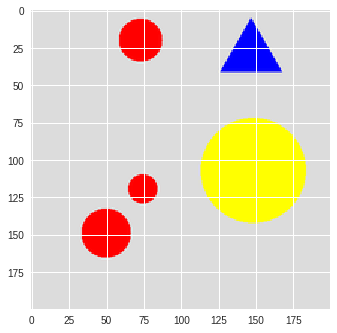

In [35]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img, img_to_array, load_img

idg = ImageDataGenerator(rescale = 1./255)
#pattern = "onered"
#pattern = "onetriangle"
#pattern = "twosquares"
#pattern = "allcolors"
#pattern = "allshapes"
pattern = "leftyellow"
#pattern = "leftsquare"

trainGen = idg.flow_from_directory(
   'train/'+pattern,
   target_size = imgsize,
   batch_size = 64,
   color_mode="rgb",
   #class_mode = 'categorical',
   #class_mode="sparse",
   class_mode="binary",   
)
validateGen = idg.flow_from_directory(
   'test/'+pattern,
   target_size = imgsize,
   batch_size = 64,
   color_mode="rgb",
   #class_mode = 'categorical',
   #class_mode="sparse",
   class_mode="binary"
)

import matplotlib.pyplot as plt
x= img_to_array(next(trainGen)[0][0])
print(x.shape)
plt.imshow(x)

x= img_to_array(next(validateGen)[0][0])
plt.imshow(x)

In [44]:
history = model.fit_generator(trainGen, validation_data=validateGen, epochs=25)
model.save_weights('first_try.h5')

#model.fit(x=x_train,y=y_train, epochs=3, callbacks=[tbCallBack])
#model.evaluate(x_test, y_test)

Epoch 1/25
16/16 [==============================] - 11s 706ms/step - loss: 0.0905 - acc: 0.9610 - val_loss: 0.2939 - val_acc: 0.8650
Epoch 2/25
16/16 [==============================] - 11s 670ms/step - loss: 0.0806 - acc: 0.9730 - val_loss: 0.3222 - val_acc: 0.8650
Epoch 3/25
16/16 [==============================] - 11s 667ms/step - loss: 0.0759 - acc: 0.9730 - val_loss: 0.2910 - val_acc: 0.8700
Epoch 4/25
16/16 [==============================] - 11s 664ms/step - loss: 0.0483 - acc: 0.9900 - val_loss: 0.3578 - val_acc: 0.8550
Epoch 5/25
16/16 [==============================] - 11s 658ms/step - loss: 0.0350 - acc: 0.9980 - val_loss: 0.3470 - val_acc: 0.8700
Epoch 6/25
16/16 [==============================] - 11s 662ms/step - loss: 0.0272 - acc: 0.9970 - val_loss: 0.3348 - val_acc: 0.8750
Epoch 7/25
16/16 [==============================] - 10s 656ms/step - loss: 0.0201 - acc: 1.0000 - val_loss: 0.3804 - val_acc: 0.8750
Epoch 8/25
16/16 [==============================] - 11s 668ms/step - 

(200, 200, 3)


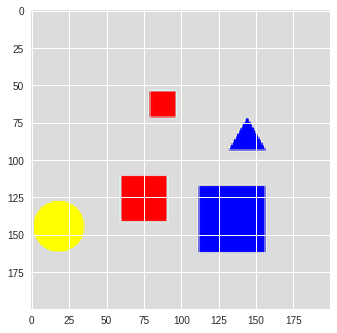

In [45]:
#image_index = 4445
#plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
#pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
#print(pred.argmax())

import matplotlib.pyplot as plt
img = load_img('test/leftyellow/true/000001.png')  # this is a PIL image
x= img_to_array(img)/255
plt.imshow(x)
print(x.shape)

In [0]:
#def visualize_x(x):
#    x_batch = np.expand_dims(x, axis=0)
#    model.predict(x_batch)
#    x = np.squeeze(x_batch, axis=0)
#    plt
    
#viszalize_x()

(1, 1)


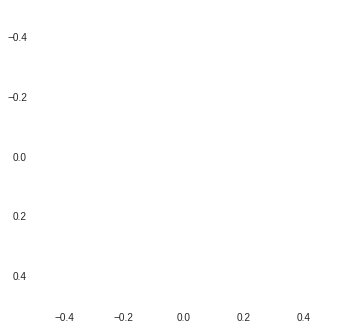

In [47]:
import numpy as np
x_batch = np.expand_dims(x, axis=0)
conv_x = model.predict(x_batch)
print(conv_x.shape)
plt.imshow(conv_x)

In [48]:
validateGen.reset()
pred=model.predict_generator(validateGen,verbose=1)

predicted_class_indices=np.argmax(pred,axis=1)

labels = (trainGen.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

4/4 [==============================] - 1s 275ms/step


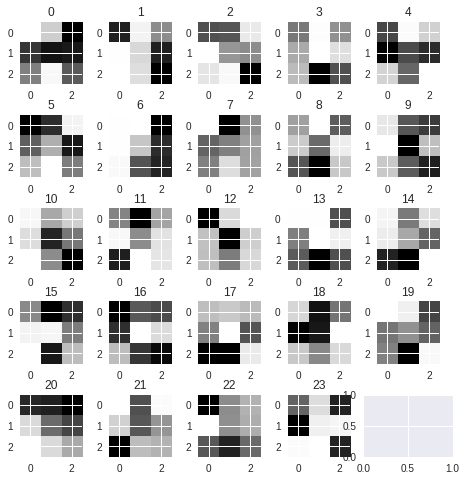

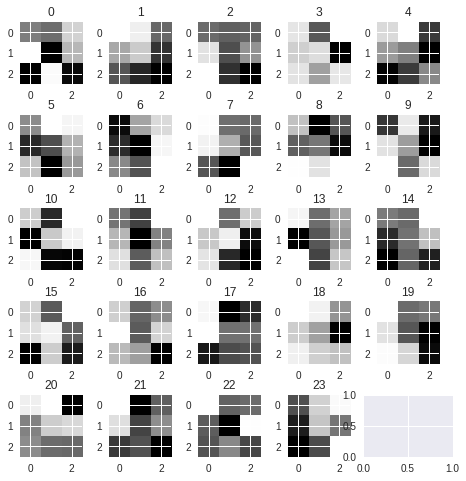

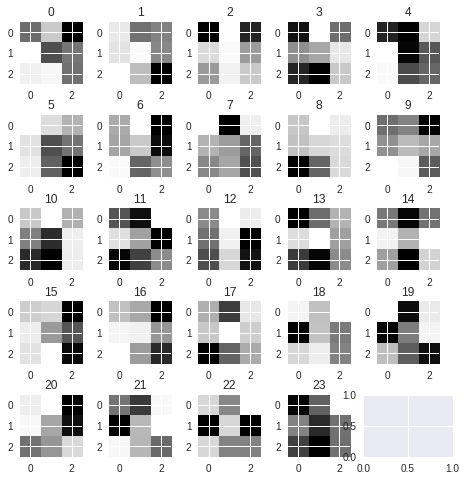

In [49]:
def plot_conv_weights(model, layer, c):
    #W = model.get_layer(name=layer).get_weights()[0]
    W = model.layers[layer].get_weights()[0]
    if len(W.shape) == 4:
        W = np.squeeze(W)
        W = W.reshape((W.shape[0], W.shape[1], W.shape[2]*W.shape[3])) 
        fig, axs = plt.subplots(5,5, figsize=(8,8))
        fig.subplots_adjust(hspace = .5, wspace=.001)
        axs = axs.ravel()
        for i in range(c):
            axs[i].imshow(W[:,:,i])
            axs[i].set_title(str(i))
    
plot_conv_weights(model, 1, 24)
plot_conv_weights(model, 4, 24)
plot_conv_weights(model, 6, 24)

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


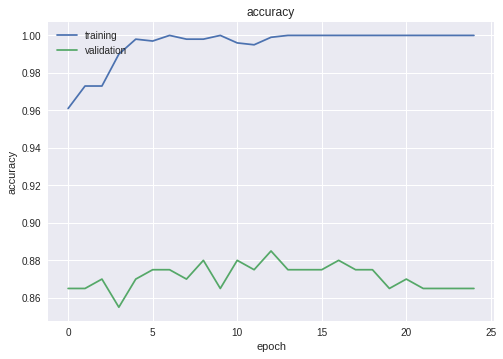

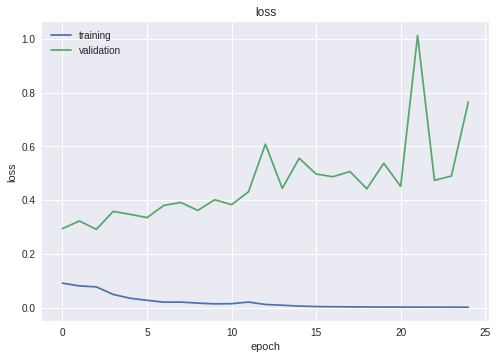

In [50]:
print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.figure()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [51]:
labels = (trainGen.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'false', 1: 'true'}
